

# Jash Bhatia
60009200073



#Setting up

Data Processing and Visualization Modules
1.   Numpy
2.   Pandas
3.   Seaborn
4.   Matplotlib
5.   Folium

Machine Learning Modules
1.  Train Test Split
2.  Logistic Regression
3.  Random Forest Classifier
4.  K-Neighbours Classifier
5.  SelectKBest
6.  chi2
7.  Confusion Matrix
8.  Classification Report
9.  Precision Score
10. Recall Score
11. Accuracy Score


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import HTML
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score

importing data

In [2]:
data = pd.read_csv('/onlinedeliverydata[1].csv')

FileNotFoundError: [Errno 2] No such file or directory: '/onlinedeliverydata[1].csv'

structure of our data

In [ ]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [ ]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

Even before moving on to the data visualization step, we can see that some form of dimensionality reduction will be required to avoid overfitting when we fit the model on this data. In the next steps we will see how we can do it.

#Data Visualizations

Continuous Variables

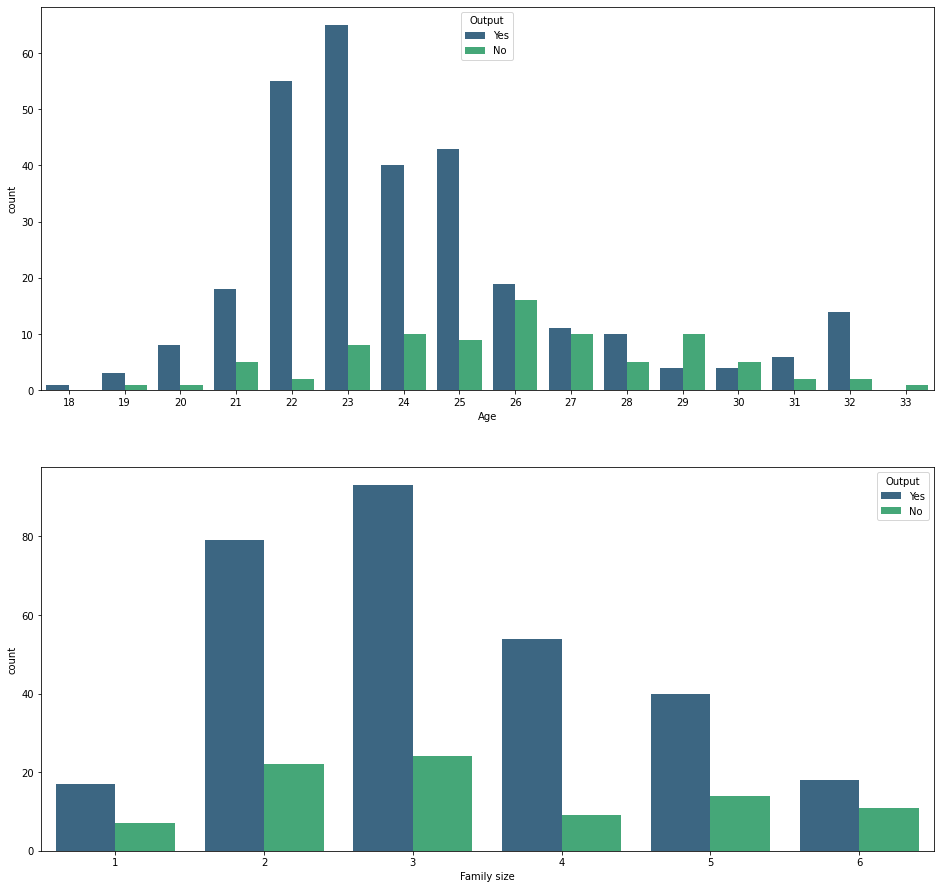

In [ ]:
%matplotlib inline

_ = [0, 6]
_ = list(enumerate([list(data.columns)[i] for i in _], start=1))

fig = plt.figure(figsize=[16,24])
for index, col_name in _:
    ax = fig.add_subplot(3, 1, index)    
    sns.countplot(x=col_name, data=data, hue='Output', palette='viridis')

There are no extreme values in both the continuous variables (age and family size), hence we do not need to treat the data for outliers. We can also see that reordering is more prevalent in age groups less than 25, and family size of less than 4

**Categorical Variables**

In [ ]:
# Creating a class for grouping categorical variables into frequency tables
class CategoricalGrouping():
    
    def __init__(self, data, col1, col2):
        self.data = data  # Pandas dataframe
        self.col1 = col1  # Column with categories for analysis
        self.col2 = col2  # Output variable
        
    @property
    def table(self):
        return self.data.groupby([self.col1, self.col2]).size().reset_index().pivot(
            columns=self.col1, index=self.col2, values=0).fillna(0)


# Defining a function to plot a nested pie chart
def nested_piechart(data, axis, wedge_width, pie_colors, chart_title):
    """This function takes the following arguments:
        
        data: a pandas dataframe of dimension greater than 2x1 (row x column)
        axis: matplotlib.axes.Axes object for plotting
        wedge_width: float, should be <=1
        pie_colors: list, color codes in hex, should be >= maximum # of categories
        chart_title: str, chart title to display
        
    """

    # Outer wedges
    wedges_outer, texts_outer = axis.pie(data.iloc[1], radius=1, wedgeprops=dict(width=wedge_width, edgecolor='w'), 
           startangle=90, colors=pie_colors)

    # Inner wedges
    axis.pie(data.iloc[0], radius=(1-wedge_width), wedgeprops=dict(width=wedge_width, edgecolor='w', alpha=0.7), 
           startangle=90, colors=pie_colors)

    axis.set(aspect="equal", title=chart_title)

    axis.legend(wedges_outer, list(data.columns),
              title=chart_title,
              loc="lower center",
              bbox_to_anchor=(0.85, -0.1, 0.5, 1))

    # Defining properties for annotations
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    y = np.sin(np.deg2rad(120))  # Converting degrees to radians
    x = np.cos(np.deg2rad(120))  # Converting degrees to radians

    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]  # Depending on the radians of x, will give -1 or 1
    connectionstyle = "angle,angleA=0,angleB={}".format(120)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})  # adding connection style args to kw dict
    axis.annotate(data.index[1], xy=(x, y), xytext=(1*np.sign(x), 1.2*y), 
                horizontalalignment=horizontalalignment, **kw)

    y = np.sin(np.deg2rad(140)) - 0.60  # Converting degrees to radians
    x = np.cos(np.deg2rad(140)) + 0.37  # Converting degrees to radians

    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]  # Depending on the radians of x, will give -1 or 1
    connectionstyle = "angle,angleA=0,angleB={}".format(140)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})  # adding connection style args to kw dict
    axis.annotate(data.index[0], xy=(x, y), xytext=(0.01*np.sign(x), -2*y), 
                horizontalalignment=horizontalalignment, **kw)

Below is an array of pie charts created for each categorical variable, with the hue set to the Output variable

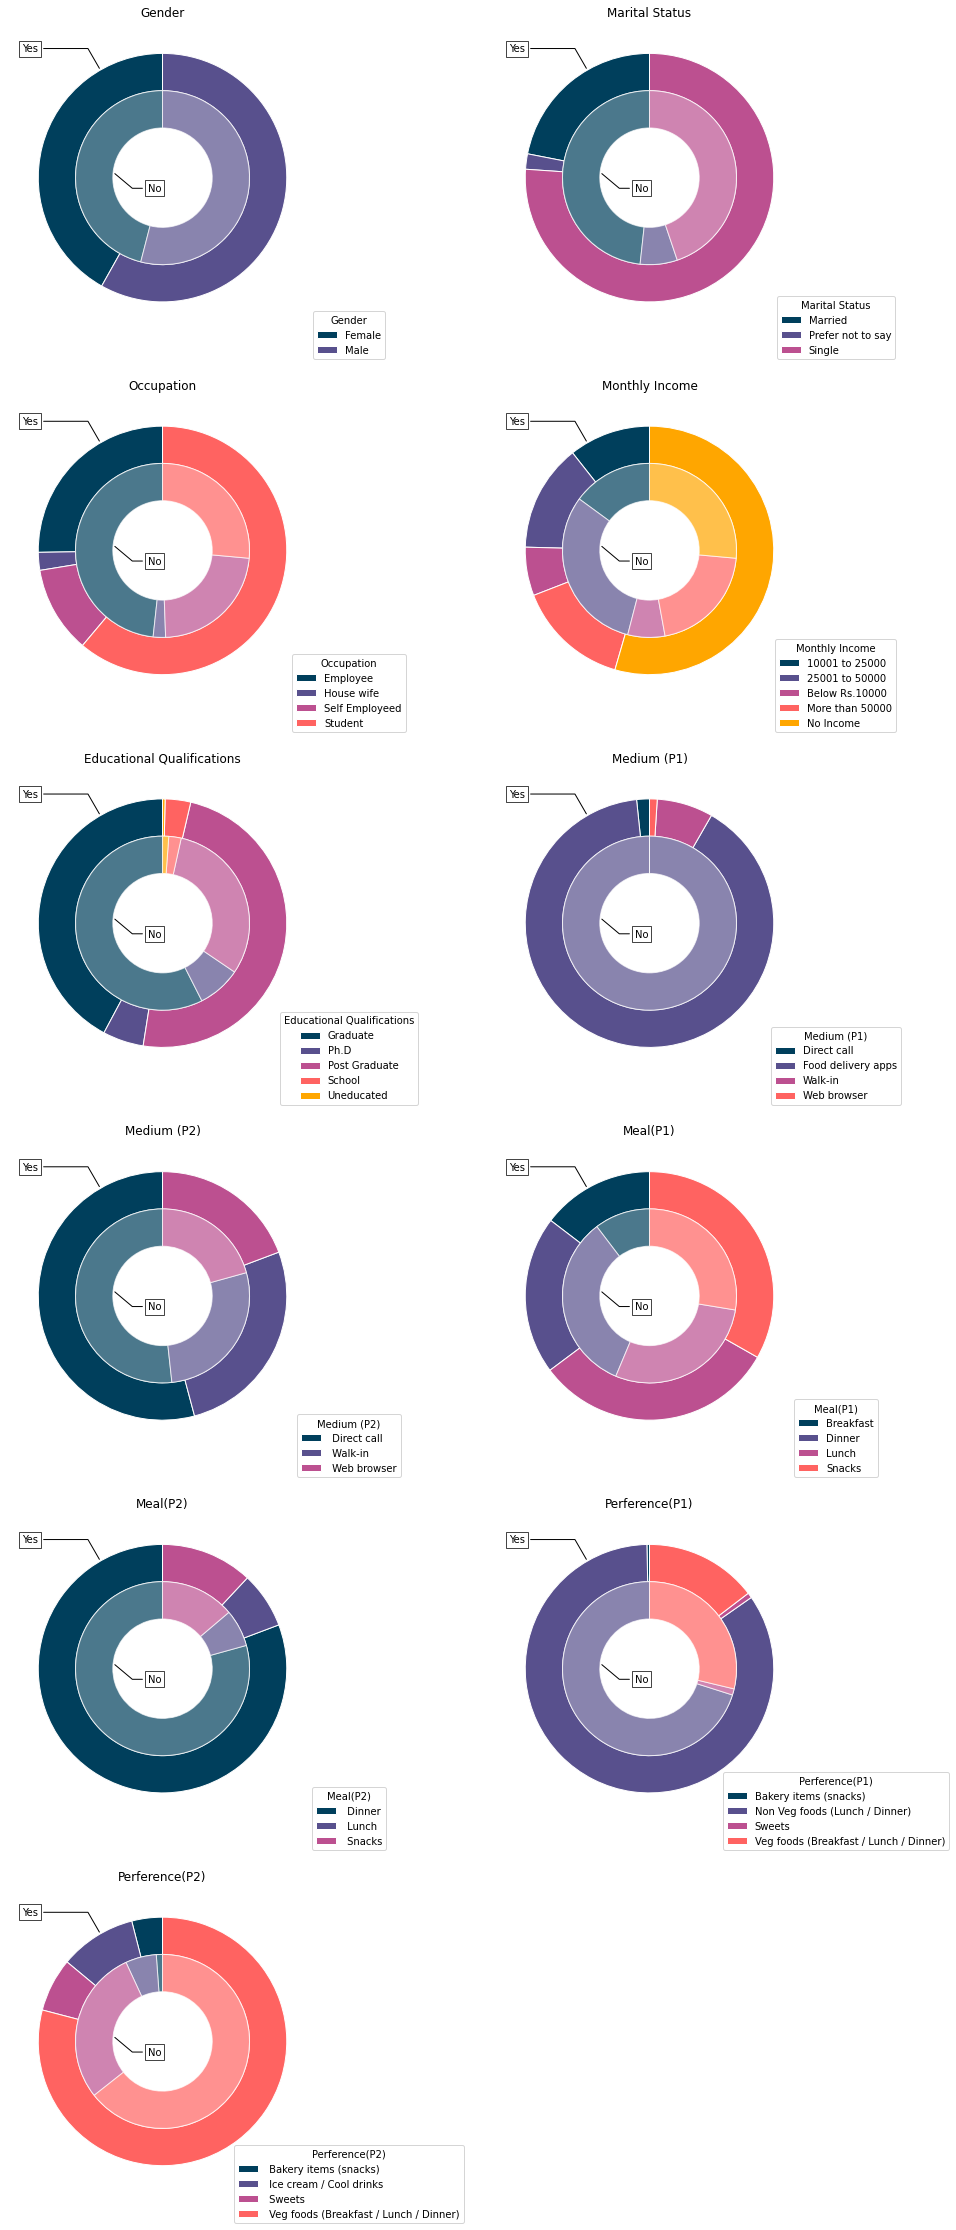

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=[16,40])

size = 0.3
c2 = 'Output'
c_palette = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

cat_var = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Medium (P1)', 
           'Medium (P2)', 'Meal(P1)', 'Meal(P2)', 'Perference(P1)', 'Perference(P2)']

ax_list = []

for ind, var in enumerate(cat_var):
    ax_list.append(fig.add_subplot(6, 2, (ind+1)))
    nested_piechart(CategoricalGrouping(data, var, c2).table, ax_list[ind], size, c_palette, var)

The variables Medium (P1), Medium (P2), Meal (P1) and Meal (P2) contribute little to no information which may help in predicting customer churn. In Medium (P1) for example, a customer who did not order again was using a food delivery app, which is redundant. Other variables also do not offer any more information, as the distribution of the classes seems the same.

We will now proceed to drop these variables</font>

In [ ]:
data.drop(['Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)'], axis=1, inplace=True)

Geospatial analysis

In [ ]:
%matplotlib inline

x = data.groupby(['latitude', 'longitude', 'Pin code']).size().reset_index()
x.columns = ['latitude', 'longitude', 'pincode', 'frequency']
x.sort_values(by=['frequency'], ascending=False, inplace=True)

latitude = 12.972442
longitude = 77.580643
delivery_map = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lon, freq, pin in zip(x['latitude'], x['longitude'], x['frequency'], x['pincode']):
    folium.CircleMarker([lat, lon], radius=freq, 
                        popup = ('Pincode: ' + str(pin) + '<br>' 
                                 '# of customers: ' + str(freq)
                                ), 
                        tooltip='Click to expand',
                        color='b', 
                        fill_color='red', 
                        fill=True, 
                        fill_opacity=0.6).add_to(delivery_map)

In [ ]:
delivery_map

We have 388 rows of data, but only 77 unique coordinates, which indicates that either there are only 77 customers in this data set, or the lat-lon location is not exact and adheres to a certain area. Since this dataset is derived from a survey, we can assume the latter. This is also substantiated by the fact that there are 77 unique pincodes in the dataset. The above map visualization shows the density of customers across various pincodes of Bangalore.

We would drop the lat, lon and pincode variables from the data set. This is due to the fact that the data is comprised of responses from various individuals, and these set of variables provide no information other than where these individuals are situated in Bangalore.

In [ ]:
data.drop(['latitude', 'longitude', 'Pin code'], axis=1, inplace=True)

Correlation Matrix

Before plotting the correlation matrix, we need to account for variables which are in the form of likert scales, and express them in the form of ordinal rank order scale. Then we will use Spearman's rank correlation to compute the correlation matrix for these variables in order to get a better understanding of our features

In [ ]:
# Finding out all unique sets of categorical variables within the features
data_list = []
for r in data.iloc[:, np.r_[1, 4, 5, 9:47]].columns:
    df_row = list(data[r].unique())
    df_row = pd.Series(dict(enumerate(sorted(df_row))))
    data_list.append(df_row)

df_1 = pd.DataFrame(data=data_list, index=data.iloc[:,np.r_[1, 4, 5, 9:47]].columns)

df_1['combined'] = df_1.apply(lambda x: ', '.join(x.dropna().values.tolist()), axis=1)
df_1.drop([0, 1, 2, 3, 4], inplace=True, axis=1)
df_1 = df_1.reset_index()

df_1['index'] = df_1.groupby(['combined'])['index'].transform(lambda x : ','.join(x))
df_1 = df_1.drop_duplicates()
df_1.columns = ['features', 'data_categories']
df_1.drop([23, 24], axis=0, inplace=True)
df_1 = df_1.reset_index()
df_1.drop('index', axis=1, inplace=True)

x1 = list(enumerate([[0, 1], [2, 3, 1, 4, 0], 
                     [2, 4, 3, 1, 0], [4, 2, 3, 5, 1], 
                     [1, 2, 3, 4, 5], [4, 2, 3, 5, 1], 
                     [4, 3, 2, 1, 5], [1, 0]]
                   ))

for i, l in x1:
    df_1.at[i, 'data_categories'] = dict(zip(df_1.iloc[i, 1].split(', '), l))

In [ ]:
for i in df_1.index:
    for j in df_1.iloc[i, 0].split(','):
        data[j] = data[j].apply(lambda x: df_1.iloc[i, 1][x])

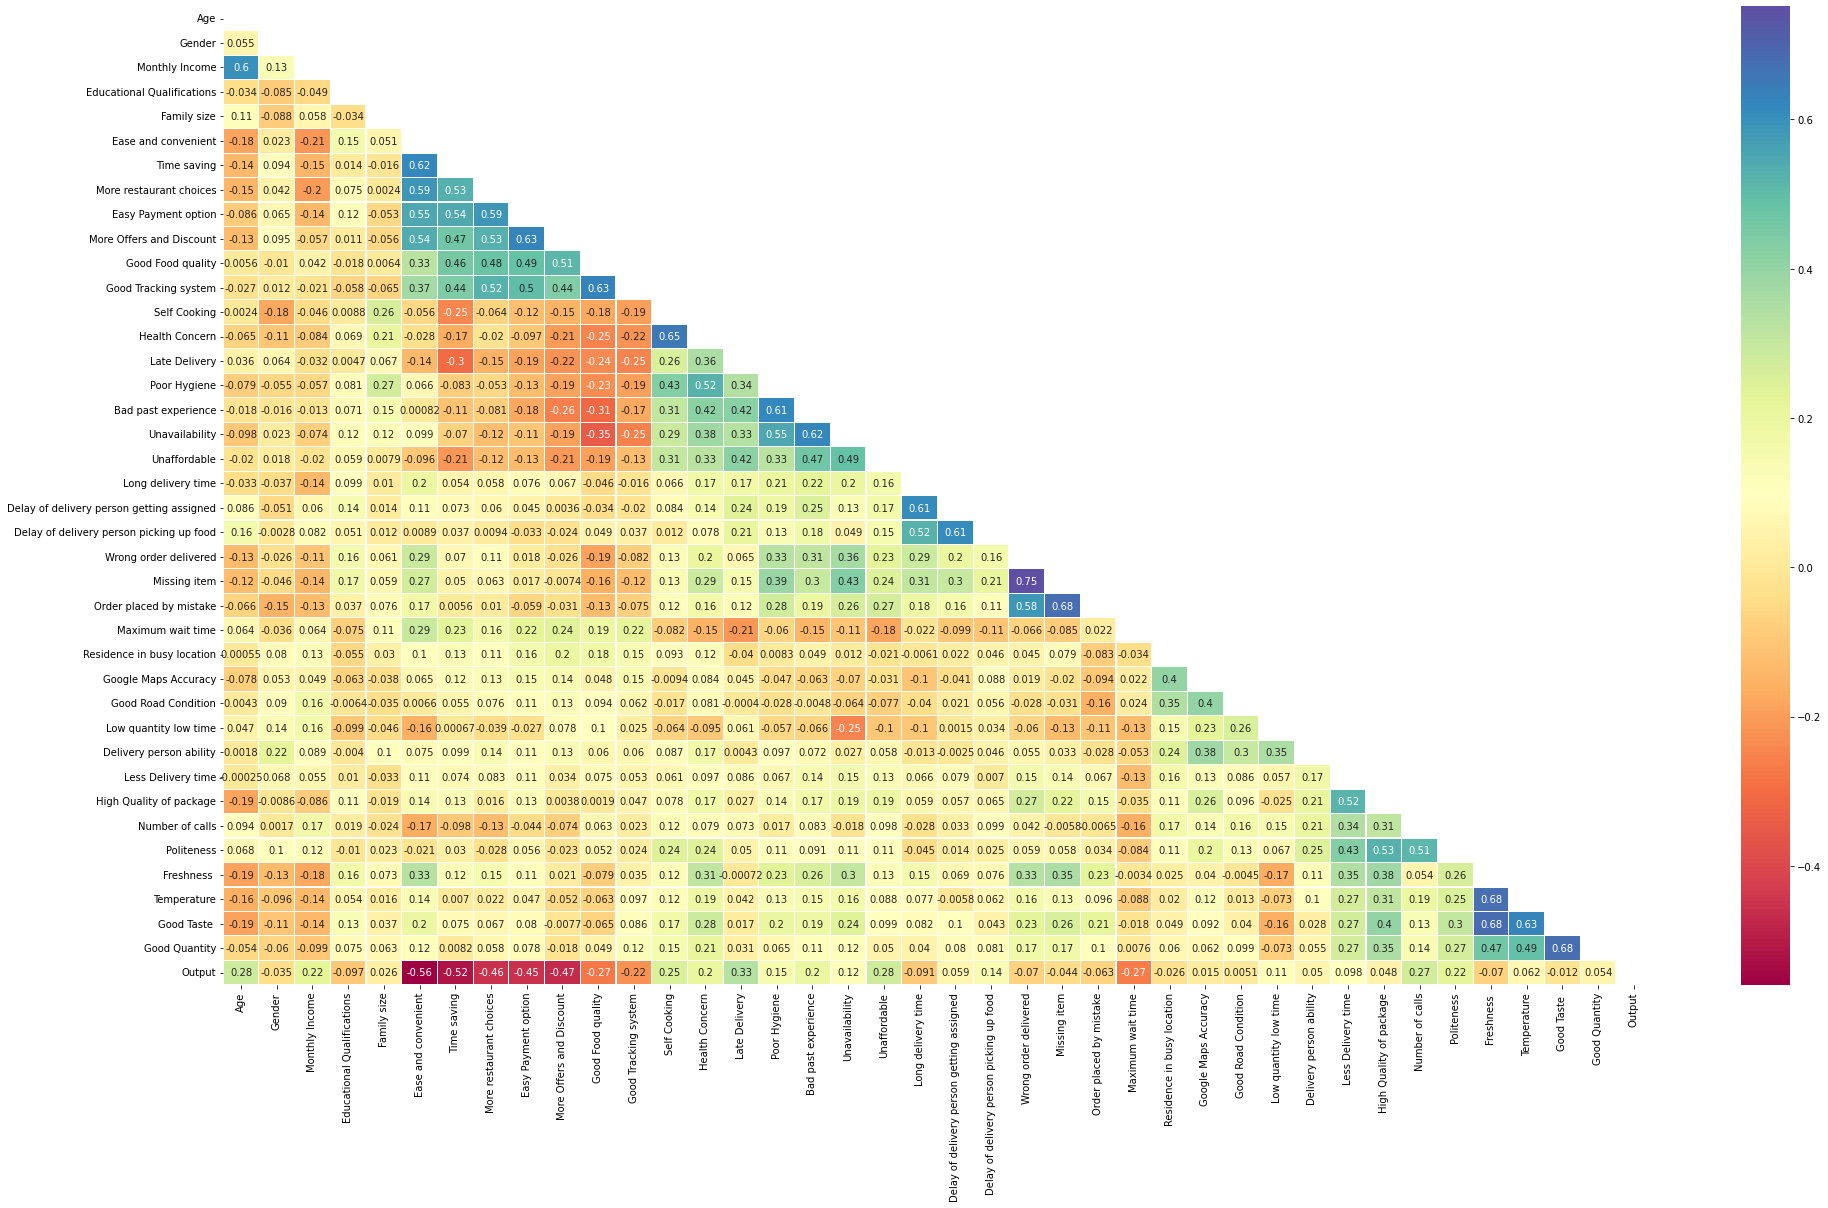

In [ ]:
%matplotlib inline


fig = plt.figure(figsize=[32, 18])
sns.heatmap(data.corr(method='spearman'), annot=True, mask=np.triu(data.corr(method='spearman')), cmap='Spectral', 
            linewidths=0.1, linecolor='white')

We notice that not only are features from 'Ease and convenient' to 'Good Tracking system' correlated with our output variable, but also with each other. In fact, if we observe the diagonals, we can see which features are correlated with each other, which gives us an insight as to how we can compress the multiple dimensions in our variables. One of the popular dimensionality reduction methods, principal component analysis will not help in this case because the variables are of ordinal categorical nature rather than continuous. We will use other feature selection methods later in the data pre-processing stage

#Data Pre-processing

Some of the pre-processing has been done in the visualization step itself, where we converted likert features to an ordinal scale. There are a few features remaining which are still categorical. We will convert these to dummy variables now

In [ ]:
_ = pd.get_dummies(data.iloc[:, [2, 3, 7, 8, 29, 30, 37]], drop_first=True)
data.drop([data.columns[i] for i in [2, 3, 7, 8, 29, 30, 37, 47]], axis=1, inplace=True)
data = data.join(_)
data

,Age,Gender,Monthly Income,Educational Qualifications,Family size,Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,...,Perference(P1)_Veg foods (Breakfast / Lunch / Dinner),Perference(P2)_ Ice cream / Cool drinks,Perference(P2)_ Sweets,Perference(P2)_ Veg foods (Breakfast / Lunch / Dinner),Influence of time_No,Influence of time_Yes,Order Time_Weekdays (Mon-Fri),Order Time_Weekend (Sat & Sun),Influence of rating_No,Influence of rating_Yes
0,20,0,0,3,4,3,3,3,3,3,...,0,0,0,0,0,1,0,1,0,1
1,24,0,1,2,3,5,5,5,5,5,...,0,0,0,1,0,1,0,0,0,1
2,22,1,1,3,3,5,5,5,3,3,...,0,1,0,0,0,1,0,0,0,1
3,22,0,0,2,6,4,4,5,4,5,...,1,0,0,0,0,1,0,0,0,1
4,22,1,1,3,4,4,4,4,4,4,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,0,0,3,2,4,4,5,4,4,...,0,0,0,1,0,1,0,0,0,0
384,23,0,0,3,4,3,3,3,3,3,...,0,0,0,1,0,1,0,1,0,1
385,22,0,0,3,5,4,4,4,4,4,...,0,0,0,1,0,1,0,0,0,1
386,23,1,1,3,2,5,5,5,5,4,...,0,0,0,1,0,0,0,1,0,1


In [ ]:
X = data.drop('Output', axis=1) # input categorical features
y = data['Output'] # target variable

In [ ]:
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X, y)

chi2_scores = pd.DataFrame([sf_fit.scores_, X.columns], index=['feature_score', 'feature_name']).transpose()
chi2_scores = chi2_scores.sort_values(by=['feature_score'], ascending=True).reset_index().drop('index', axis=1)

Text(0.5, 0, 'Score')

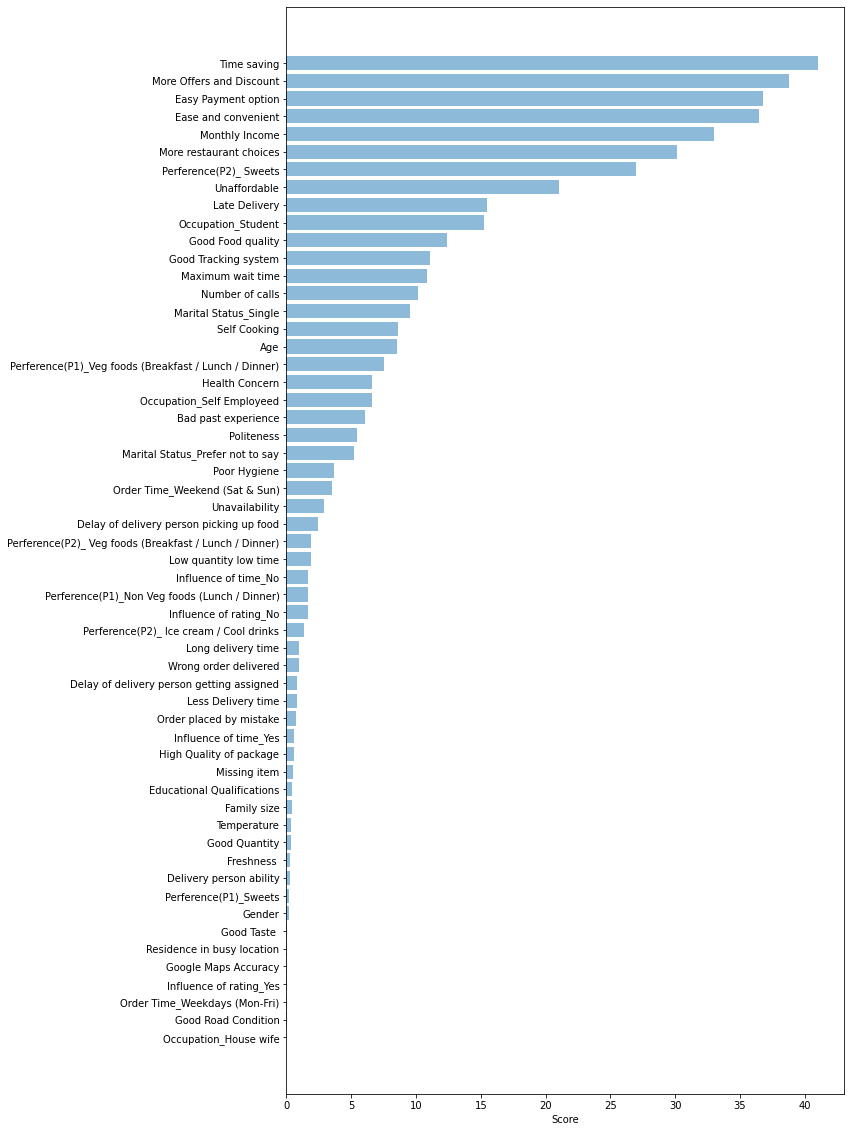

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=[10, 20])
plt.barh(chi2_scores['feature_name'], chi2_scores['feature_score'], align='center', alpha=0.5)
plt.xlabel('Score')

As a starting point, we will select the top 20 features with the highest 

---

feature scores and see if we need to drop any variables later due to overfitting

In [ ]:
X = X[list(chi2_scores.iloc[-20:,1])]
X

,Occupation_Self Employeed,Health Concern,Perference(P1)_Veg foods (Breakfast / Lunch / Dinner),Age,Self Cooking,Marital Status_Single,Number of calls,Maximum wait time,Good Tracking system,Good Food quality,Occupation_Student,Late Delivery,Unaffordable,Perference(P2)_ Sweets,More restaurant choices,Monthly Income,Ease and convenient,Easy Payment option,More Offers and Discount,Time saving
0,0,3,0,20,3,1,3,2,3,3,1,3,3,0,3,0,3,3,3,3
1,0,5,0,24,5,1,5,2,4,3,1,4,5,0,5,1,5,5,5,5
2,0,3,0,22,2,1,3,3,3,2,1,3,4,0,5,1,5,3,3,5
3,0,5,1,22,4,1,3,2,4,4,1,3,3,0,5,0,4,4,5,4
4,0,5,0,22,4,1,3,2,3,3,1,5,2,0,4,1,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0,4,0,23,4,1,4,2,4,3,1,3,2,0,5,0,4,4,4,4
384,0,4,0,23,4,1,3,3,3,3,1,3,3,0,3,0,3,3,3,3
385,0,5,0,22,4,1,4,3,4,3,1,4,4,0,4,0,4,4,4,4
386,0,5,0,23,4,1,4,3,5,4,1,2,3,0,5,1,5,5,4,5


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

#Modeling

1. Logistic Regression

In [ ]:
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

print(classification_report(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        57
           1       1.00      0.86      0.92        21

    accuracy                           0.96        78
   macro avg       0.97      0.93      0.95        78
weighted avg       0.96      0.96      0.96        78

[[57  0]
 [ 3 18]]


In [ ]:
score_logisticregression = accuracy_score(log_pred,y_test)*100
score_logisticregression

96.15384615384616

2. random forest

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        57
           1       1.00      0.90      0.95        21

    accuracy                           0.97        78
   macro avg       0.98      0.95      0.97        78
weighted avg       0.98      0.97      0.97        78

[[57  0]
 [ 2 19]]


In [ ]:
score_forest = accuracy_score(rfc_pred,y_test)*100
score_forest

97.43589743589743

K Nearest Neighbors

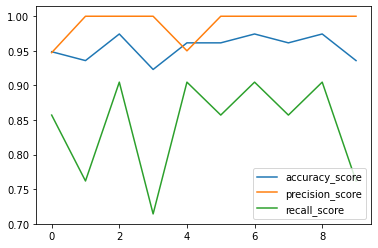

In [ ]:
error_rate = []

for i in range(1,11):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append([accuracy_score(y_test, pred_i), precision_score(y_test, pred_i), 
                       recall_score(y_test, pred_i)])

error_rate = pd.DataFrame(error_rate, columns=['accuracy_score', 'precision_score', 'recall_score'])
error_rate.plot()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)

print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        57
           1       1.00      0.90      0.95        21

    accuracy                           0.97        78
   macro avg       0.98      0.95      0.97        78
weighted avg       0.98      0.97      0.97        78

[[57  0]
 [ 2 19]]


In [ ]:
score_knn = accuracy_score(knn_pred,y_test)*100
score_knn

97.43589743589743

#conclusion

Out of all models created, Random Forest and K Nearest Neighbors give the best performance. K Nearest Neighbors has the added advantage of being relatively simpler to interpret, without any sacrifice in accuracy.

Another consideration is about the data itself. We see that most of the variables that have a material impact on customer churn relate to broad aspects of ease and convenience. In fact, the subset of features selected in the model could inform business decisions, regarding which aspects of the service could be focused on for minimizing churn, and what user segments should the marketing dollars be spent on.</font>

NOTE:- We ignored the text data, i.e. reviews in this analysis and analysing with NLP methods could also add to the analysis